In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [50]:
img = cv2.imread(r"C:\Users\BARTU\Desktop\images\digital_sp_line2.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #grayscaling
denoised = cv2.fastNlMeansDenoising(gray,None,20,7,21)

In [51]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(denoised, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

In [52]:
edges = cv2.Canny(closing, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=25, maxLineGap=40)
mask = np.zeros_like(closing)

In [53]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), 255, 2)

result = cv2.inpaint(closing, mask, 3, cv2.INPAINT_TELEA)

In [54]:
sharpening_kernel = np.array([[-1, -1, -1], 
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Apply the sharpening kernel
sharpened_result = cv2.filter2D(result, -1, sharpening_kernel)

In [55]:
binary_img = cv2.threshold(sharpened_result, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
detected_digits = pytesseract.image_to_string(binary_img, config=r'--oem 3 --psm 6 outputbase digits')

print("Detected Digits:", detected_digits)

Detected Digits: 12345678



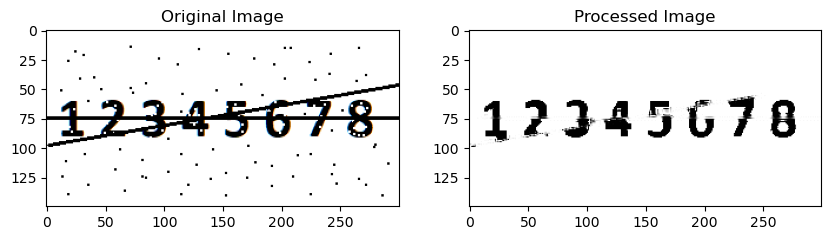

In [56]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sharpened_result, cmap='gray')
plt.title('Processed Image')

plt.show()

In [57]:
contours, hierarchy = cv2.findContours(sharpened_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print ("Number of contours detected = %d" % len(contours))

min_height = 10
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if h > min_height:
        cv2.rectangle(img,(x,y),(x+w,y+h+1),(0,255,0),2)

Number of contours detected = 1


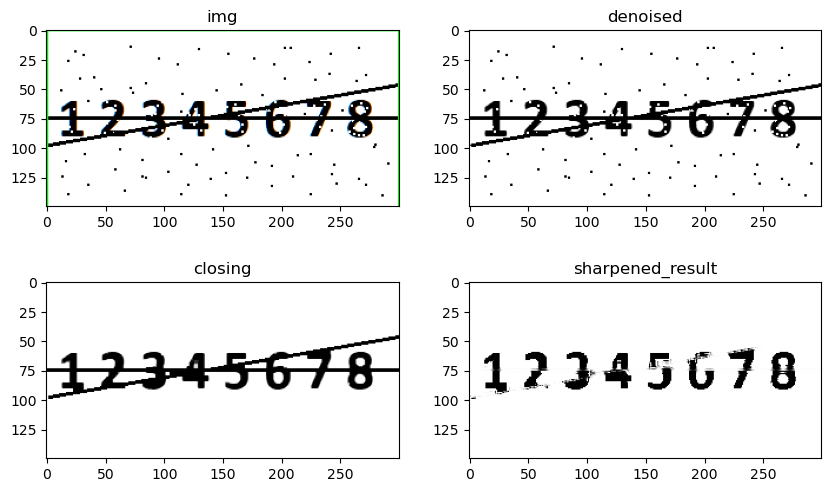

In [58]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('img')

plt.subplot(2, 2, 2)
plt.imshow(denoised, cmap='gray')
plt.title('denoised')

plt.subplot(2, 2, 3)
plt.imshow(closing, cmap='gray')
plt.title('closing')

plt.subplot(2, 2, 4)
plt.imshow(sharpened_result, cmap='gray')
plt.title('sharpened_result')

plt.show()

In [59]:
#control detection